### CatBoost is like XGBoost but more advanced. It has tuning in itslef and it can tun the parameteres byself. Another advantage of CatBoost is that use GPU fpr processing data, instead of anothers that use CPU. 

##### We should install by running: pip install -U catboost

##### CatBoost has  regression and classification operations.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
df

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,587620,A,B,A,A,A,A,A,A,B,...,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
188314,587624,A,A,A,A,A,B,A,A,A,...,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
188315,587630,A,B,A,A,A,A,A,B,B,...,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,5762.64
188316,587632,A,B,A,A,A,A,A,A,B,...,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,1562.87


##### Above is insurance dataset with unknown datas. at the end is loss that insurance paid for each person. 

##### As above, cats are categorical datas and conts is continous datas. Thats better to say that each data of conts are min_max scaled and it is not their real value.

In [3]:
df.isnull().sum()

id        0
cat1      0
cat2      0
cat3      0
cat4      0
         ..
cont11    0
cont12    0
cont13    0
cont14    0
loss      0
Length: 132, dtype: int64

In [4]:
df.isnull().sum().sum()

0

In [5]:
df.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


##### However we write df.describe(), the result is not helpful.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [7]:
traindf = pd.read_csv('train.csv')
testdf = pd.read_csv('test.csv')

##### We have two types of dataset. we will train the traindf and predict the testdf.

In [8]:
testdf

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125541,587617,A,A,A,B,A,A,A,A,A,...,0.281143,0.438917,0.815941,0.39455,0.48740,0.40666,0.550529,0.538473,0.298734,0.345946
125542,587621,A,A,A,A,B,B,A,B,A,...,0.674529,0.346948,0.424968,0.47669,0.25753,0.26894,0.324486,0.352251,0.490001,0.290576
125543,587627,B,B,A,A,B,A,A,A,B,...,0.794794,0.808958,0.511502,0.72299,0.94438,0.83510,0.933174,0.926619,0.848129,0.808125
125544,587629,A,A,A,A,A,B,A,B,A,...,0.302678,0.372125,0.388545,0.31796,0.32128,0.36974,0.307628,0.301921,0.608259,0.361542


In [9]:
import re

# Compile patterns for matching 'cat1' to 'cat999'
cat_pattern = re.compile(r'^cat(\d+)$')
cont_pattern = re.compile(r'^cont(\d+)$')

# Filter and sort categorical columns
cat_col = sorted(
    [col for col in traindf.columns if cat_pattern.match(col)],
    key=lambda s: int(s[3:])
)
cat_col

['cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18',
 'cat19',
 'cat20',
 'cat21',
 'cat22',
 'cat23',
 'cat24',
 'cat25',
 'cat26',
 'cat27',
 'cat28',
 'cat29',
 'cat30',
 'cat31',
 'cat32',
 'cat33',
 'cat34',
 'cat35',
 'cat36',
 'cat37',
 'cat38',
 'cat39',
 'cat40',
 'cat41',
 'cat42',
 'cat43',
 'cat44',
 'cat45',
 'cat46',
 'cat47',
 'cat48',
 'cat49',
 'cat50',
 'cat51',
 'cat52',
 'cat53',
 'cat54',
 'cat55',
 'cat56',
 'cat57',
 'cat58',
 'cat59',
 'cat60',
 'cat61',
 'cat62',
 'cat63',
 'cat64',
 'cat65',
 'cat66',
 'cat67',
 'cat68',
 'cat69',
 'cat70',
 'cat71',
 'cat72',
 'cat73',
 'cat74',
 'cat75',
 'cat76',
 'cat77',
 'cat78',
 'cat79',
 'cat80',
 'cat81',
 'cat82',
 'cat83',
 'cat84',
 'cat85',
 'cat86',
 'cat87',
 'cat88',
 'cat89',
 'cat90',
 'cat91',
 'cat92',
 'cat93',
 'cat94',
 'cat95',
 'cat96',
 'cat97',
 'cat98',
 'cat99',
 'cat100',
 'cat101

In [10]:
# ✔ Imports the re module (Regular Expressions) used for pattern matching.

# cat_pattern = re.compile(r'^cat(\d+)$')
# Compiles a regular expression that matches strings like 'cat1', 'cat2', ..., 'cat999'.

# Pattern explained:

# ^ → start of the string

# cat → the literal text "cat"

# (\d+) → one or more digits (like 1, 22, 345)

# $ → end of the string

# So it matches exactly strings like cat3, cat10, but not cat10extra or mycat10.

# cont_pattern = re.compile(r'^cont(\d+)$')
# Similar to above, but for continuous feature names like cont1, cont2, etc.

# cat_col = sorted([...], key=lambda s: int(s[3:]))
# This line:

# Loops over traindf.columns, which are the names of columns in a DataFrame.

# Keeps only those column names that match the cat_pattern (i.e., match 'cat1' through 'cat999').

# Sorts them numerically, not alphabetically, using:

# int(s[3:]): extracts the number after 'cat' and converts it to integer.

# Example: 'cat2' becomes 2, 'cat10' becomes 10, etc.

In [11]:
cat_index = [i for i in range(0, len(traindf.columns)) if cat_pattern.match(traindf.columns[i])]
cat_index

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116]

In [12]:
# 🔍 Purpose:
# This code finds the column indexes (i.e., their numeric positions) in the DataFrame traindf for all columns that match the pattern cat\d+ — such as cat1, cat2, ..., cat116.

# 🧠 Explanation:
# 1. range(0, len(traindf.columns))
# Generates a range of numbers from 0 to the number of columns in traindf (excluding the end).

# These are the indexes of the columns.

# 2. traindf.columns[i]
# Accesses the name of the column at position i.

# 3. cat_pattern.match(traindf.columns[i])
# Uses a regular expression pattern to check if the column name matches something like 'cat1', 'cat2', etc.

# cat_pattern = re.compile(r'^cat(\d+)$') should already be defined earlier in your code.

# 4. [i for ... if ...]
# This is a list comprehension that builds a list of all indexes i where the column name matches the cat pattern.



In [13]:
cont_col = sorted(
    [col for col in traindf.columns if cont_pattern.match(col)],
    key=lambda s: int(s[4:])
)
cont_col

['cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14']

In [14]:
# This code extracts all continuous feature column names (like cont1, cont2, ...) from a DataFrame called traindf, and sorts them numerically.

# ✅ sorted(..., key=lambda s: int(s[4:]))
# Sorts the list numerically using the number part of the string.

# s[4:] → slices the string from index 4 onward

# Example: 'cont3' → '3', 'cont25' → '25'

# int(s[4:]) → converts it into an integer for correct numeric sorting

In [15]:
cont_index = [i for i in range(0, len(traindf.columns)) if cont_pattern.match(traindf.columns[i])]
cont_index

[117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]

(<Axes: xlabel='loss', ylabel='Count'>,)

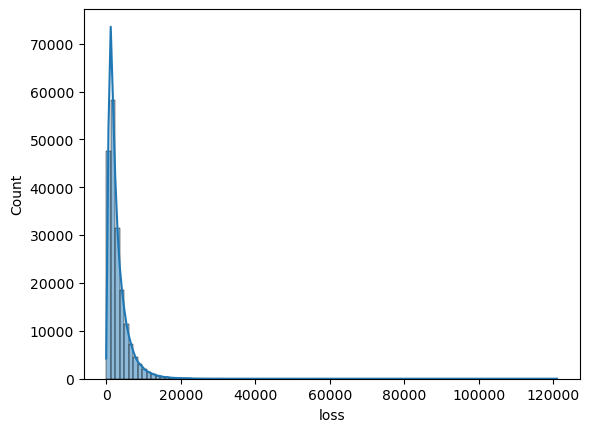

In [16]:
import seaborn as sns
sns.histplot(df['loss'], bins=100, kde=True),

##### AS above, our hist is right skewness. So that is better to transform it to normal. As I mentioned it is better, Not necessary.

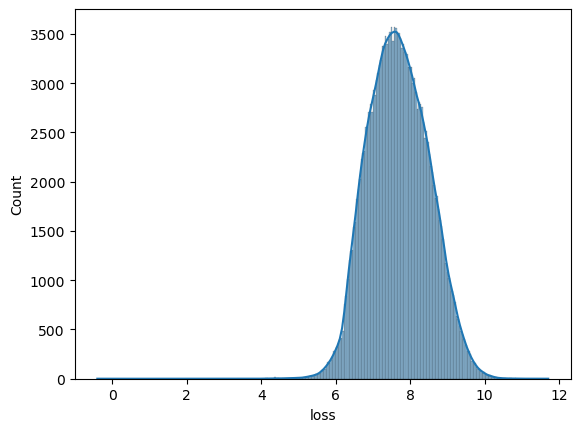

In [17]:
sns.histplot(np.log(df['loss']), kde=True);

##### Now we are going to train and test the model:

In [18]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

In [19]:
cb_reg = CatBoostRegressor(iterations = 120, learning_rate=0.05, depth=6, eval_metric='MAE', verbose=10)

In [20]:
# This line initializes a CatBoostRegressor model — a powerful gradient boosting algorithm optimized for categorical data and high performance. Below is what each parameter does:

# | Parameter            | Description                                                                                                                |
# | -------------------- | -------------------------------------------------------------------------------------------------------------------------- |
# | `iterations=120`     | The total number of boosting rounds (i.e., trees). More iterations usually lead to better accuracy, up to a point.         |
# | `learning_rate=0.05` | Controls how much the model learns from each iteration. Lower values mean slower but more precise learning.                |
# | `depth=6`            | The depth of each decision tree. Higher depth can model more complex relationships but risks overfitting.                  |
# | `eval_metric='MAE'`  | The evaluation metric used during training. Here it’s **Mean Absolute Error**, which penalizes large errors less than MSE. |
# | `verbose=10`         | Prints training progress every 10 iterations. Helps monitor performance during training.                                   |

# 💡 CatBoost Highlights:
# Handles categorical variables natively (unlike XGBoost/LightGBM).

# Supports missing values.

# Requires less preprocessing.

# Highly accurate and efficient.

In [21]:
x = df.drop(['id', 'loss'], axis=1)
y = np.log(df['loss'])
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123, test_size=0.25)

##### As  we have data with large memory space occupied, we should delete the datas we do not need.

In [22]:
del x
del y

In [23]:
np.asarray(cat_index) - 1

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115])

In [24]:
# Also we can use np.array(cat_index) - 1 but there are some difference.

# | Feature            | `np.array()`                               | `np.asarray()`                                   |
# | ------------------ | ------------------------------------------ | ------------------------------------------------ |
# | **Always copies?** | Yes (creates a **new copy** of the data)   | No, unless needed (e.g., for type conversion)    |
# | **Faster?**        | Slightly slower (because it always copies) | Slightly faster (skips copy if already an array) |
# | **Use case**       | Use when you need a new independent array  | Use when input might already be a NumPy array    |

# 💡 When to Use Which?
# Use np.array() if:

# You want to ensure a copy of the input (e.g., you're modifying it).

# You want to change dtype or shape explicitly.

# Use np.asarray() if:

# You're working with functions that may pass NumPy arrays.

# You want to avoid unnecessary copying for performance.

##### As before we removed id column, so the cat_index become -1.

In [25]:
cb_reg.fit(x_train, y_train, np.asarray(cat_index) -1, eval_set=(x_test, y_test))

0:	learn: 0.6477590	test: 0.6494355	best: 0.6494355 (0)	total: 225ms	remaining: 26.7s
10:	learn: 0.5618648	test: 0.5635349	best: 0.5635349 (10)	total: 862ms	remaining: 8.54s
20:	learn: 0.5176842	test: 0.5193726	best: 0.5193726 (20)	total: 1.46s	remaining: 6.89s
30:	learn: 0.4917490	test: 0.4933894	best: 0.4933894 (30)	total: 2.08s	remaining: 5.97s
40:	learn: 0.4757679	test: 0.4777449	best: 0.4777449 (40)	total: 2.67s	remaining: 5.15s
50:	learn: 0.4651767	test: 0.4673669	best: 0.4673669 (50)	total: 3.27s	remaining: 4.43s
60:	learn: 0.4571878	test: 0.4596060	best: 0.4596060 (60)	total: 3.9s	remaining: 3.78s
70:	learn: 0.4513110	test: 0.4538142	best: 0.4538142 (70)	total: 4.51s	remaining: 3.12s
80:	learn: 0.4468587	test: 0.4495596	best: 0.4495596 (80)	total: 5.12s	remaining: 2.47s
90:	learn: 0.4432433	test: 0.4460570	best: 0.4460570 (90)	total: 5.74s	remaining: 1.83s
100:	learn: 0.4404866	test: 0.4433463	best: 0.4433463 (100)	total: 6.37s	remaining: 1.2s
110:	learn: 0.4381826	test: 0.4411

In [26]:
# | Argument                    | Meaning                                                                                                                                                                |
# | --------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
# | `x_train`                   | Your training input data (features).                                                                                                                                   |
# | `y_train`                   | The target variable (e.g., loss, price, etc.).                                                                                                                         |
# | `np.asarray(cat_index) - 1` | Tells CatBoost which **columns** (by **index**) are **categorical features**. Subtracting 1 might be necessary if the column indices are 1-based in your source logic. |
# | `eval_set=(x_test, y_test)` | A validation set on which CatBoost evaluates the model after each iteration. Useful for monitoring overfitting and model performance.                                  |

# Let’s say your dataset has 132 columns, and 116 of them are categorical (cat1 to cat116). You’ve extracted their column indexes into cat_index, and you're telling CatBoost:

# "These are the columns that should be treated as categorical, not numeric."

# CatBoost won’t one-hot encode them like scikit-learn; it uses efficient internal techniques that usually perform better.

# 💡 Why Use CatBoost?
# Handles categorical variables natively.

# Requires less preprocessing than XGBoost/LightGBM.

# Often outperforms other models on tabular datasets with mixed features.

##### Then we would change the log(df['loss']) to df['loss'].

In [27]:
np.exp(0.439629485)

1.5521320237619909

##### Just for notice, all train done on cpu. now we want to do it in gpu.

In [28]:
cb_reg = CatBoostRegressor(iterations = 200, learning_rate=0.05, depth=6, eval_metric='MAE', verbose=10, task_type='GPU', save_snapshot=True, snapshot_file='mohammadreza', snapshot_interval=10 ) 

In [29]:
# | Parameter                          | Meaning                                                                                                                  |
# | ---------------------------------- | ------------------------------------------------------------------------------------------------------------------------ |
# | **`iterations=200`**               | Number of boosting rounds (trees). The model will train for 200 iterations.                                              |
# | **`learning_rate=0.05`**           | Controls how much the model is updated at each step. Lower means slower training but often better generalization.        |
# | **`depth=6`**                      | Maximum depth of each decision tree (controls model complexity).                                                         |
# | **`eval_metric='MAE'`**            | The evaluation metric to optimize is **Mean Absolute Error**. Lower MAE means better predictions.                        |
# | **`verbose=10`**                   | Print progress to the console every 10 iterations.                                                                       |
# | **`task_type='GPU'`**              | 🚀 Use your **GPU** for training instead of CPU. This drastically improves training speed, especially on large datasets. |
# | **`save_snapshot=True`**           | Enables saving **snapshots** during training. Useful if training is interrupted or takes a long time.                    |
# | **`snapshot_file='mohammadreza'`** | Name of the snapshot file that stores training state. If training is interrupted, you can resume from this file.         |
# | **`snapshot_interval=10`**         | The model will save a snapshot every 10 iterations.                                                                      |

In [30]:
x = df.drop(['id', 'loss'], axis=1)
y = np.log(df['loss'])
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123, test_size=0.25)

In [31]:
cb_reg.fit(x_train, y_train, np.asarray(cat_index) -1, eval_set=(x_test, y_test))

Default metric period is 5 because MAE is/are not implemented for GPU


bestTest = 0.4289730412
bestIteration = 199


In [32]:
np.exp(0.4289730412)

1.5356796337591856

In [33]:
cb_reg.save_model('catboost_reg.h5')

##### If we want to use the model:

In [34]:
model = cb_reg.load_model('catboost_reg.h5')

In [35]:
model

In [36]:
testdf.drop('id', axis=1, inplace=True)
testdf

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,A,B,A,A,A,A,A,A,B,A,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,A,B,A,B,A,A,A,A,B,A,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,A,B,A,B,B,A,B,A,B,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,A,A,A,A,B,A,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,B,A,A,A,A,B,A,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125541,A,A,A,B,A,A,A,A,A,A,...,0.281143,0.438917,0.815941,0.39455,0.48740,0.40666,0.550529,0.538473,0.298734,0.345946
125542,A,A,A,A,B,B,A,B,A,A,...,0.674529,0.346948,0.424968,0.47669,0.25753,0.26894,0.324486,0.352251,0.490001,0.290576
125543,B,B,A,A,B,A,A,A,B,B,...,0.794794,0.808958,0.511502,0.72299,0.94438,0.83510,0.933174,0.926619,0.848129,0.808125
125544,A,A,A,A,A,B,A,B,A,A,...,0.302678,0.372125,0.388545,0.31796,0.32128,0.36974,0.307628,0.301921,0.608259,0.361542


In [37]:
model.predict(testdf)

array([7.38559738, 7.6236115 , 9.10951239, ..., 7.84359677, 6.79103233,
       8.21779317])

In [38]:
np.exp(model.predict(testdf))

array([1612.59083566, 2045.93771681, 9040.88536248, ..., 2549.35781777,
        889.83168645, 3706.31413272])

In [39]:
testdf['loss'] = np.exp(model.predict(testdf))
testdf

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,A,B,A,A,A,A,A,A,B,A,...,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562,1612.590836
1,A,B,A,B,A,A,A,A,B,A,...,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045,2045.937717
2,A,B,A,B,B,A,B,A,B,B,...,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232,9040.885362
3,A,A,A,A,B,A,A,A,A,A,...,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955,4907.367429
4,B,A,A,A,A,B,A,A,A,A,...,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823,936.389476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125541,A,A,A,B,A,A,A,A,A,A,...,0.438917,0.815941,0.39455,0.48740,0.40666,0.550529,0.538473,0.298734,0.345946,2288.545241
125542,A,A,A,A,B,B,A,B,A,A,...,0.346948,0.424968,0.47669,0.25753,0.26894,0.324486,0.352251,0.490001,0.290576,1964.778240
125543,B,B,A,A,B,A,A,A,B,B,...,0.808958,0.511502,0.72299,0.94438,0.83510,0.933174,0.926619,0.848129,0.808125,2549.357818
125544,A,A,A,A,A,B,A,B,A,A,...,0.372125,0.388545,0.31796,0.32128,0.36974,0.307628,0.301921,0.608259,0.361542,889.831686


In [40]:
testdf.to_csv('predict.csv')

##### also we can save it in excel mode like testdf.to_excel('predict.xslx')